<a href="https://colab.research.google.com/github/Madior84/Madior-Project/blob/main/Projet_Master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0.5, 1.0, 'OD_OG')

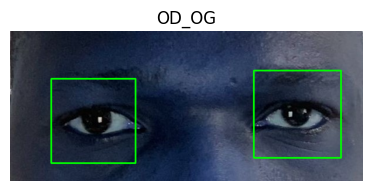

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
image = cv2.imread("Madior1 (2).jpg", 1)

# Convert the image to grayscale for easier computation
image_grey = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

cascade_classifier = cv2.CascadeClassifier("/content/haarcascade_eye.xml")
detected_objects = cascade_classifier.detectMultiScale(image_grey, minSize=(10, 10))

# Draw rectangles on the detected objects
if len(detected_objects) != 0:
    for (x, y, width, height) in detected_objects:
        cv2.rectangle(image, (x, y),
                      (x + width, y + height),
                      (0, 255, 0), 2)
fig = plt.figure(figsize=(10, 10))

rows = 2
columns = 2
fig.add_subplot(rows, columns, 1)

plt.imshow(image)
plt.axis('off')
plt.title("OD_OG")

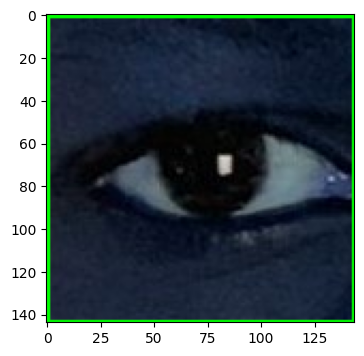

In [ ]:
OD1 = image[y:y+height, x:x+width]
fig = plt.figure(figsize=(4, 4))
plt.imshow(OD1)

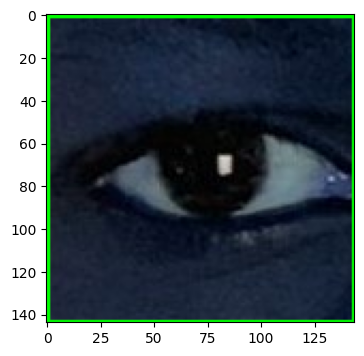

In [ ]:
OD1_gray = cv2.cvtColor(OD1, cv2.COLOR_BGR2GRAY)
fig = plt.figure(figsize=(4, 4))
plt.imshow(OD1)

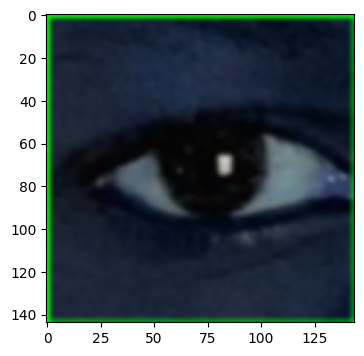

In [ ]:
OD1_blur = cv2.GaussianBlur(OD1, (5, 5), 1)
fig = plt.figure(figsize=(4, 4))
plt.imshow(OD1_blur)

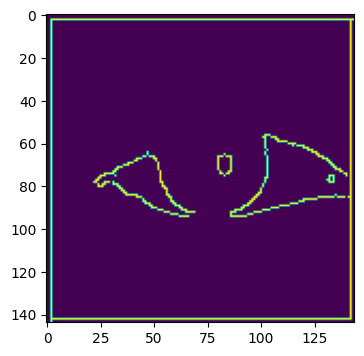

In [ ]:
# détection des contours
OD1_canny = cv2.Canny(OD1_blur, 100, 200)
fig = plt.figure(figsize=(4, 4))
plt.imshow(OD1_canny)

Number of Contours is: 6


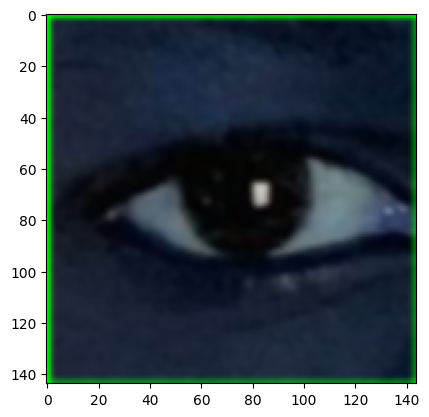

In [ ]:
# Find Contours
#contours, hierarchy = cv2.findContours(OD1_canny,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# Find Number of contours
#print("Number of Contours is: " + str(len(contours)))
# Draw yellow border around two contours
#cv2.drawContours(OD1_canny, contours, -1, (255, 255, 0), 1)
# Show the image with contours
#plt.imshow(OD1_blur)


In [ ]:
OD_color = cv2.cvtColor(OD1_blur, cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles (OD1_blur, cv2.HOUGH_GRADIENT, 1, 60, param1=40, param2=20, minRadius=0, maxRadius=0)
if circles is not None:
  circles = np.round(circles[0, :]).astype("int")
  for (x,y,r) in circles:
    cv2.circle(OD_color, (x,y), r, (0,255,0), 1)
    cv2.circle(OD_color, (x,y), 1, (0,255,0), 1)
print(x, y, r)
fig = plt.figure(figsize=(4, 4))
plt.imshow(OD_color)

error: ignored

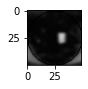

In [ ]:
cornée1_g = OD_color[y-r:y+r, x-r:x+r]
fig = plt.figure(figsize=(1, 1))
plt.imshow(cornée1_g)

In [ ]:
w1, h1 = cornée1_g.shape[:2]
print(w1, h1)

50 50


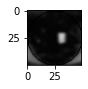

In [ ]:
# reading the image in grayscale mode
gray = cv2.cvtColor(cornée1_g, cv2.COLOR_RGB2GRAY)
fig = plt.figure(figsize=(1, 1))
plt.imshow(cornée1_g)

Number of Contours found = 3


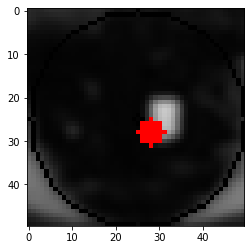

In [ ]:
# threshold
th, threshed = cv2.threshold(gray, 255, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)

contours, hierarchy = cv2.findContours(threshed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(cornée1_g, contours[-1], 2, (255, 0,0), 5)
print("Number of Contours found = " + str(len(contours)))

plt.imshow(cornée1_g)


In [ ]:
# calculate moments of binary image
cnt = contours[0]
M = cv2.moments(cnt)

# calculate x,y coordinate of center
Xr = int(M["m10"] / M["m00"])
Yr = int(M["m01"] / M["m00"])

print(Xr, Yr)


15 14


In [ ]:
dx=((w1/2)-Xr)
print(dx)



2.0
